In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 10)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_data <- read_csv(URL, col_names=FALSE, show_col_types = FALSE)
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- heart_data |>
                    mutate(ca = as_factor(ca), thal = as_factor(thal), num = as_factor(num))
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [12]:
num_obs <- nrow(heart_data)
level_percentage <- heart_data |>
    group_by(num) |>
    summarize(
        count = n(),
        percentage = n() / num_obs * 100
        )
level_percentage

num,count,percentage
<fct>,<int>,<dbl>
0,164,54.125413
1,55,18.151815
2,36,11.881188
3,35,11.551155
4,13,4.290429


In [13]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)
glimpse(heart_train)

Rows: 226
Columns: 14
$ age      <dbl> 63, 41, 56, 57, 49, 64, 58, 60, 50, 66, 43, 69, 59, 44, 42, 6…
$ sex      <dbl> 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0…
$ cp       <dbl> 1, 2, 2, 3, 2, 1, 1, 4, 3, 1, 4, 1, 4, 3, 4, 3, 1, 2, 3, 3, 3…
$ trestbps <dbl> 145, 130, 140, 150, 130, 110, 150, 130, 120, 150, 150, 140, 1…
$ chol     <dbl> 233, 204, 294, 168, 266, 211, 283, 206, 219, 226, 247, 239, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1…
$ restecg  <dbl> 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 172, 153, 174, 171, 144, 162, 132, 158, 114, 171, 151, 1…
$ exang    <dbl> 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0…
$ oldpeak  <dbl> 2.3, 1.4, 1.3, 1.6, 0.6, 1.8, 1.0, 2.4, 1.6, 2.6, 1.5, 1.8, 0…
$ slope    <dbl> 3, 1, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1…
$ ca       <fct> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0…
$ thal     <fct> 6

In [16]:
num_obs_train <- nrow(heart_train)
level_percentage_train <- heart_train |>
    group_by(num) |>
    summarize(
        count = n(),
        percentage = n() / num_obs * 100
        )
level_percentage_train

num,count,percentage
<fct>,<int>,<dbl>
0,124,40.924092
1,41,13.531353
2,25,8.250825
3,26,8.580858
4,10,3.300330


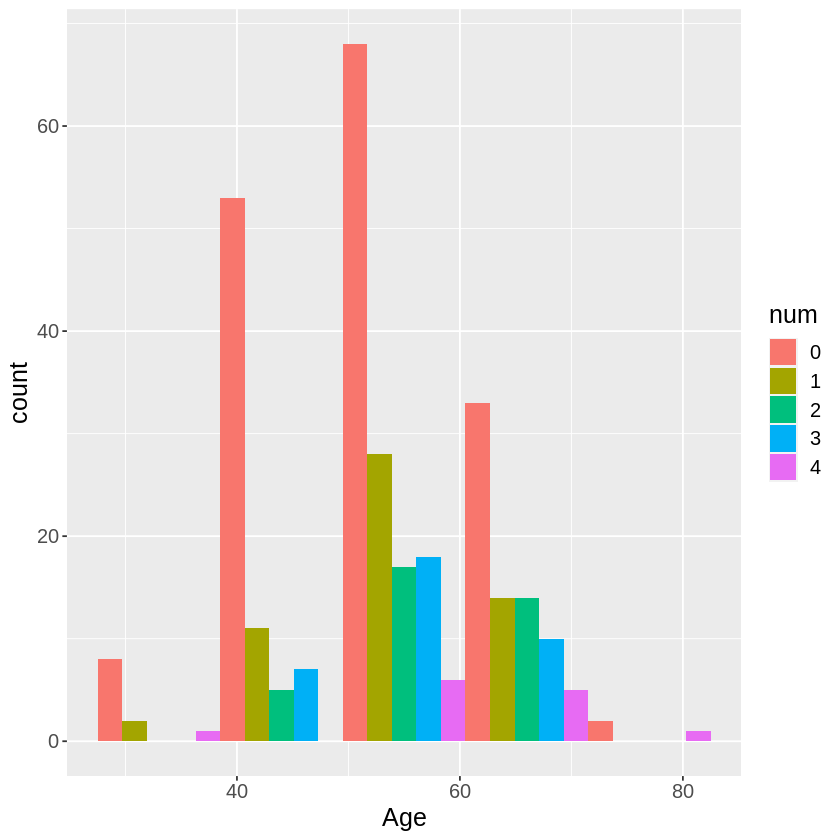

In [4]:
#filtered_data <- heart_train |>
#    filter(num != 0)

train_age_dist <- heart_data |>
                    ggplot(aes(x = age, fill = num)) +
                    geom_histogram(binwidth = 11, position = "dodge") +
                    #facet_grid(rows = vars(num)) +
                    labs(x = "Age", fill = "num") +
                    theme(text = element_text(size = 15))
train_age_dist

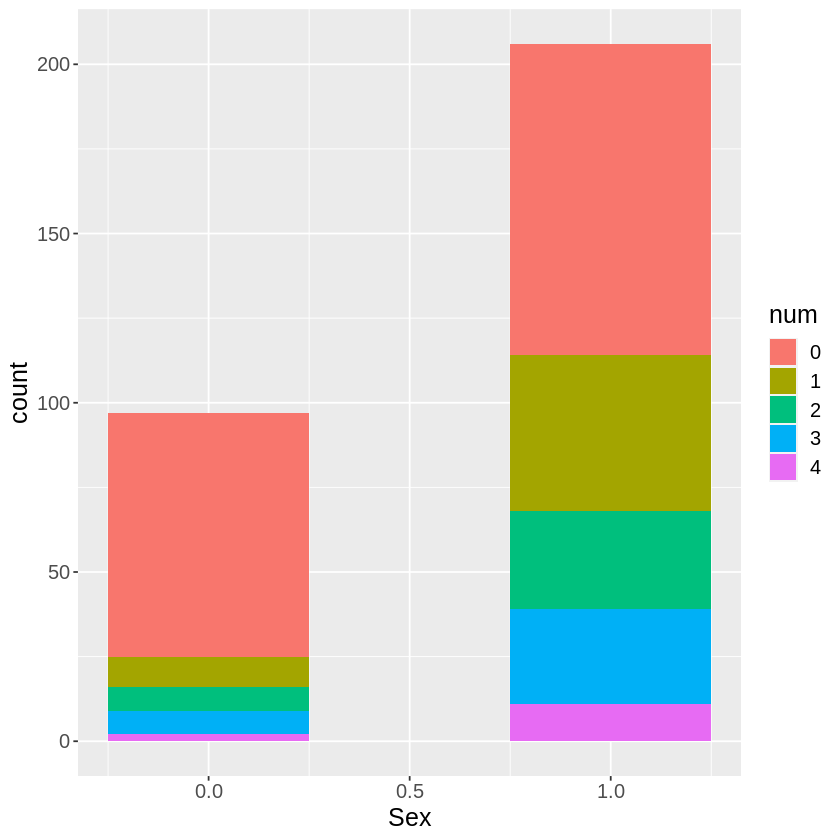

In [5]:
train_sex_dist <- heart_data |>
                    ggplot(aes(x = sex, fill = num)) +
                    geom_histogram(binwidth = .5) +
                    #facet_grid(rows = vars(num)) +
                    labs(x = "Sex", fill = "num") +
                    theme(text = element_text(size = 15))
train_sex_dist

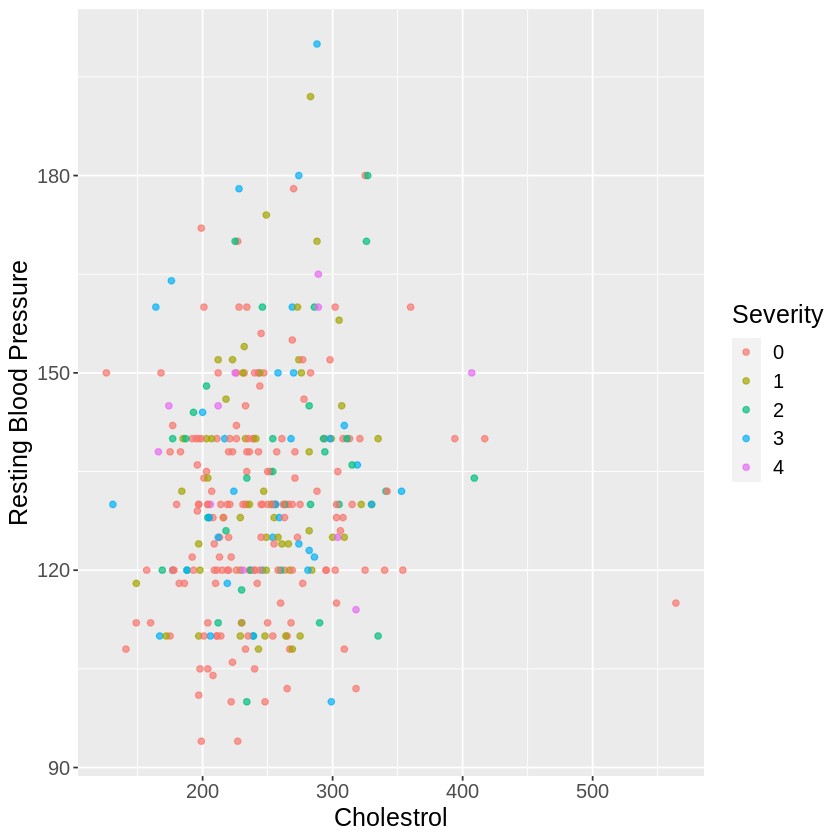

In [6]:
chol_vs_trestbps <- heart_data |>
                    ggplot(aes(x = chol, y = trestbps, color = num)) +
                    geom_point(alpha = 0.7) +
                    #facet_grid(rows = vars(num)) +
                    labs(x = "Cholestrol", y = "Resting Blood Pressure", color = "Severity") +
                    theme(text = element_text(size = 15))
chol_vs_trestbps

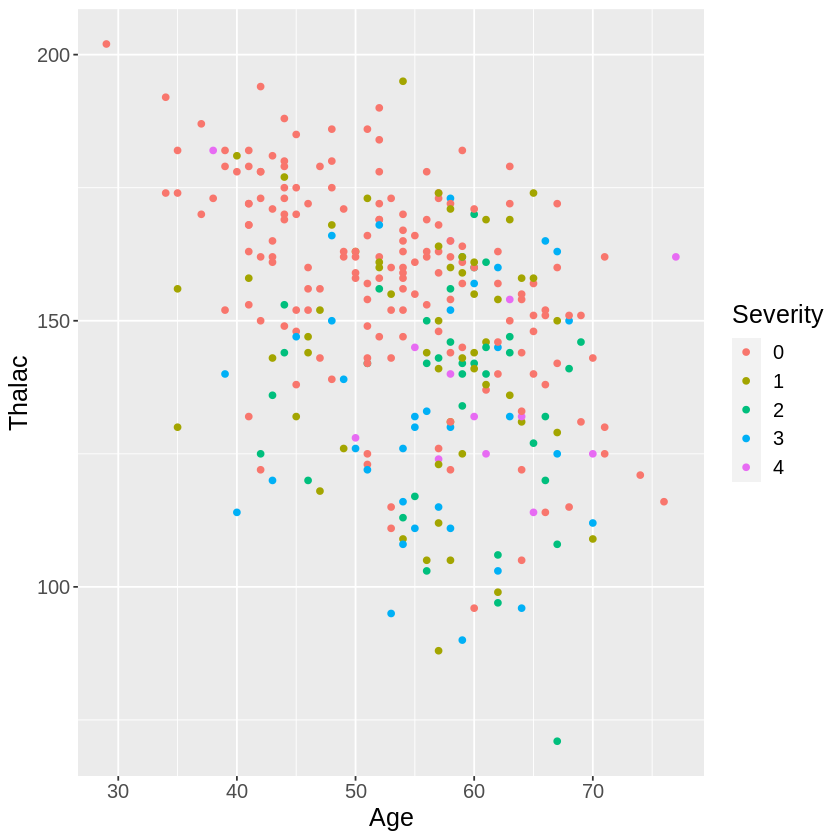

In [7]:
age_vs_thalac <- heart_data |>
                    ggplot(aes(x = age, y = thalach, color = num)) +
                    geom_point(alpha = 1) +
                    #facet_grid(rows = vars(num)) +
                    labs(x = "Age", y = "Thalac", color = "Severity") +
                    theme(text = element_text(size = 15))
age_vs_thalac

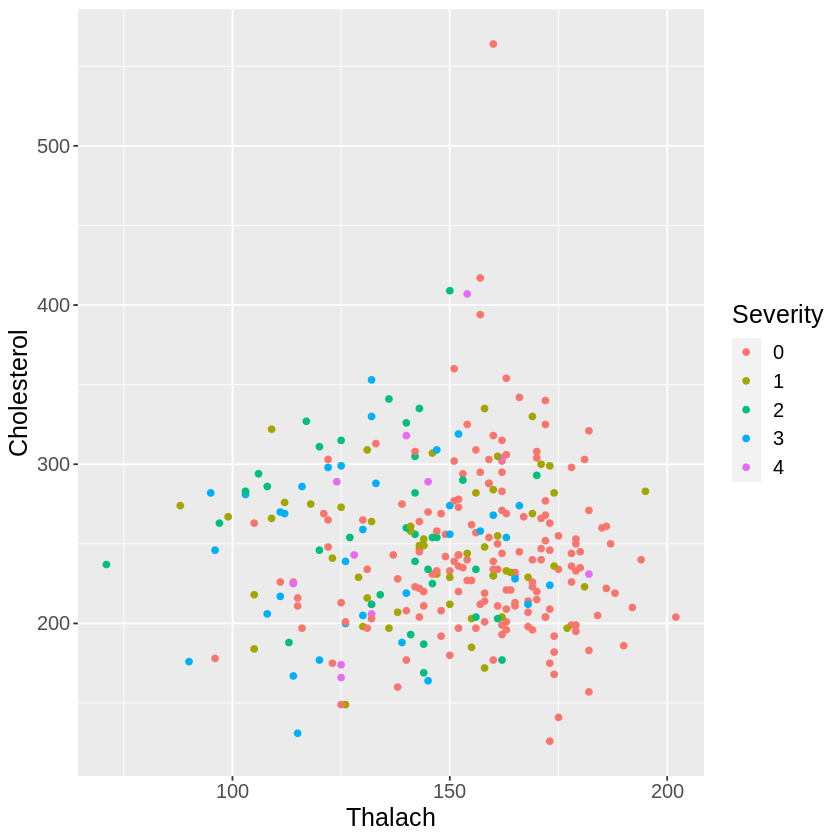

In [8]:
age_vs_oldpeak <- heart_data |>
                    ggplot(aes(x = thalach, y = chol, color = num)) +
                    geom_point(alpha = 1) +
                    #facet_grid(rows = vars(num)) +
                    labs(x = "Thalach", y = "Cholesterol", color = "Severity") +
                    theme(text = element_text(size = 15))
age_vs_oldpeak

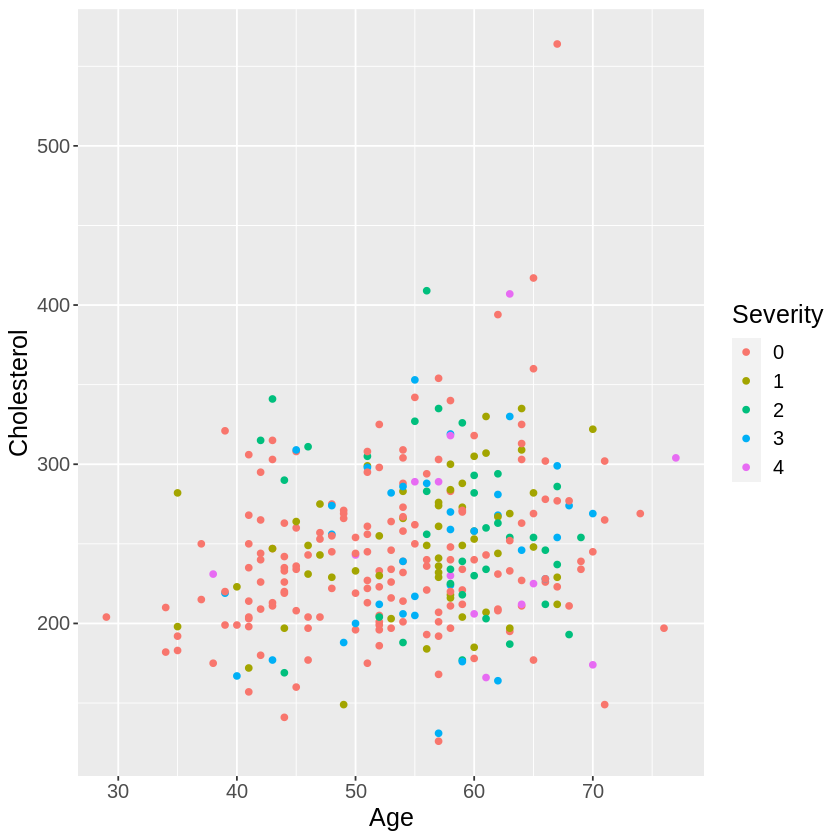

In [9]:
age_vs_chol <- heart_data |>
                    ggplot(aes(x = age, y = chol, color = num)) +
                    geom_point(alpha = 1) +
                    #facet_grid(rows = vars(num)) +
                    labs(x = "Age", y = "Cholesterol", color = "Severity") +
                    theme(text = element_text(size = 15))
age_vs_chol